In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
X = data["data"].copy()[ :, 2:4]# 2 columns to allow straightforward prediction visualization, 
                                # otherwise, e.g. in 3 dims, we need to visualize planes
y = data["target"].copy()

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

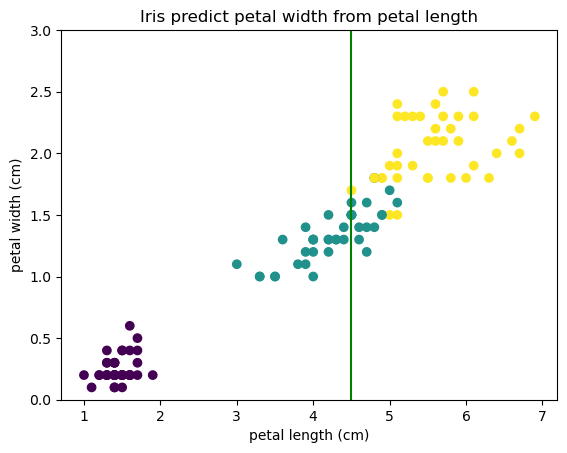

In [9]:
# Import libraries (assuming they are not already imported)
# import matplotlib.pyplot as plt

# Assuming X_train, X_test and data are defined beforehand

# Scatter plot features 2 and 3 from X_train
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)#c="blue")  # Add color based on target variable (assuming y_train exists)

# Green line at specific x-value on feature 2 of X_test (represents a data point?)
plt.plot([X_test[1,0],X_test[1,0]],[0,3],c="green")

# Set labels for the axes using feature names from data
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])

# Title the plot for clarity
plt.title("Iris predict petal width from petal length")

# Set limits for the y-axis
plt.ylim(0,3)

# Show the plot
plt.show()


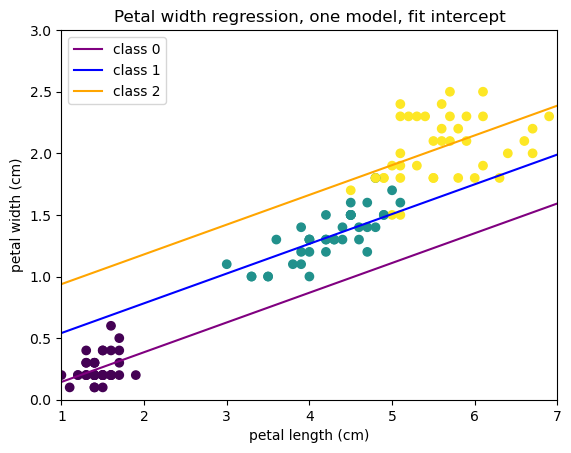

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True, #for unnormalized data set it to True
                          #normalize=False, #use normalize for normalization: NO -> deprecated in newer sklearn versions!
                          copy_X=False, #True only for normalize (that values won't be overwritten)
                          n_jobs=1)

#Also try creating one-hot vector instead of many classifications
lin_reg.fit(np.c_[X_train[:, 0],y_train], X_train[:, 1]) #join petal length with the classification targets, then join our second feture petal width for prediction

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
cs = ["purple","blue","orange"]
for i in range(3): #3 loops for 3 classes
    xs = np.c_[np.linspace(1,7,20),i*np.ones(20)] #same X feature set with different class values
    plt.plot(xs[:,0],lin_reg.predict(xs),label="class "+str(i),c=cs[i])

plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width regression, one model, fit intercept")
plt.ylim(0,3)
plt.xlim(1,7)
plt.legend()
plt.show()
#One model, with the same slope, different intercepts

#result: parallel predictions, weights all come from the same features
#petal length is the same so our slope is the same

In [26]:
print(lin_reg.coef_)
#result: first value is the slope of the petal length, second is the vertical offset
"""Therefore, lin_reg.coef_ will likely have three values:

    First element: This represents the slope of the regression line across all classes. It describes how changes in petal length affect petal width, regardless of class.
    Second and third elements: These represent the intercepts for the two additional classes (assuming three classes in your data). Each intercept indicates the predicted petal width when the petal length is zero for that particular class."""

[0.24146428 0.39702259]


'Therefore, lin_reg.coef_ will likely have three values:\n\n    First element: This represents the slope of the regression line across all classes. It describes how changes in petal length affect petal width, regardless of class.\n    Second and third elements: These represent the intercepts for the two additional classes (assuming three classes in your data). Each intercept indicates the predicted petal width when the petal length is zero for that particular class.'

In [23]:
#class offsets are constant
lin_reg.predict([[1,1]])-lin_reg.predict([[1,0]]),lin_reg.predict([[1,2]])-lin_reg.predict([[1,1]])

(array([0.39702259]), array([0.39702259]))

In [24]:
lin_reg.predict([[1,1]])

array([0.5412598])

In [27]:
#slight intercpet offset:This value corresponds to the point where the regression line intersects the y-axis (petal width in your case).
lin_reg.intercept_

-0.09722708007127068

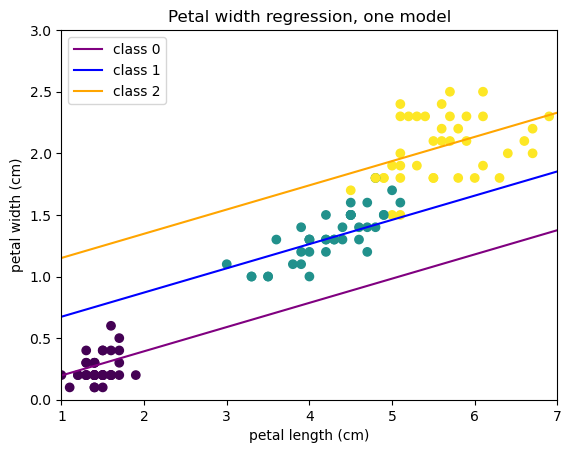

In [28]:
#same thing but now with fit_intercept=False
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(np.c_[X_train[:, 0],y_train], X_train[:, 1])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
cs = ["purple","blue","orange"]
for i in range(3):
    xs = np.c_[np.linspace(1,7,20),i*np.ones(20)]
    plt.plot(xs[:,0],lin_reg.predict(xs),label="class "+str(i),c=cs[i])

plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width regression, one model")
plt.ylim(0,3)
plt.xlim(1,7)
plt.legend()
plt.show()

In [29]:
lin_reg.predict([[1,1]])# value after re-training model with fit intercept set to false

array([0.67359262])

In [30]:
lin_reg.score(X_test, y_test)
#score outputs the mean squared error of our dataset
#No longer have accuracy
# R**2 = 1 - np.sum((y_test - lin_reg.predict(X_test))**2)/np.sum((y_test - np.mean(y_test))**2) #1-MSE
# scores from 1 (best) -> -inf

0.7810217336529277

In [31]:
#training one model for each individual class, 3 linear regressions
#Taken the class out of the model and used it to create separate models
#3 models gives us best fit lines
x_t = np.linspace(1,7,100)
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train[y_train==0][:, 0].reshape(-1,1),X_train[y_train==0][:, 1])
preds_1 = lin_reg_1.predict(x_t.reshape(-1,1))
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train[y_train==1][:, 0].reshape(-1,1),X_train[y_train==1][:, 1])
preds_2 = lin_reg_2.predict(x_t.reshape(-1,1))
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_train[y_train==2][:, 0].reshape(-1,1),X_train[y_train==2][:, 1])
preds_3 = lin_reg_3.predict(x_t.reshape(-1,1))

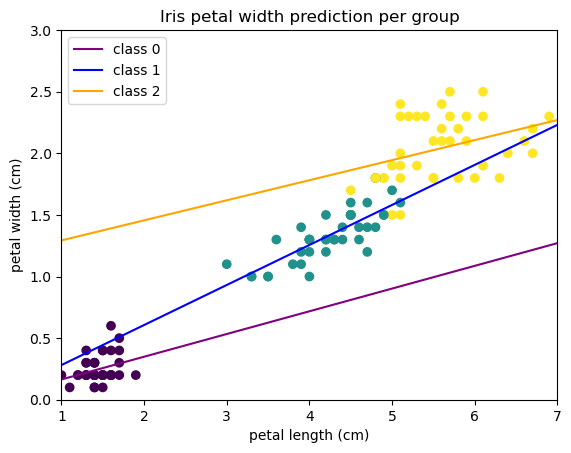

In [32]:
plt.title("Iris petal width prediction per group")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.plot(x_t, preds_1, c="purple",label="class 0")
plt.plot(x_t, preds_2, c="blue",label="class 1")
plt.plot(x_t, preds_3, c="orange",label="class 2")
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.legend()
plt.ylim(0,3)
plt.xlim(1,7)
plt.show()
#Multiple models, different slopes, different intercepts

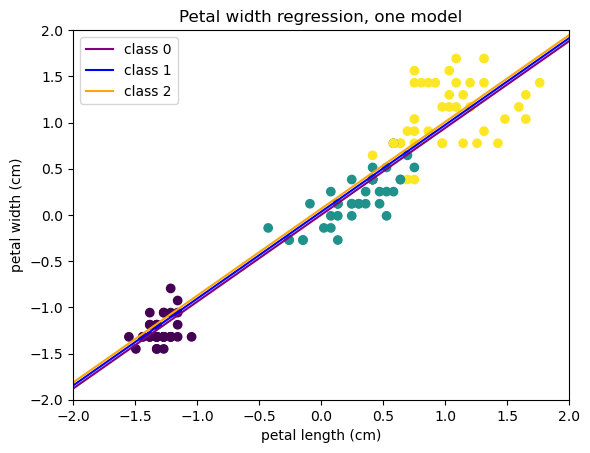

In [33]:
pipe = Pipeline([('ss_scaler',StandardScaler())])
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(np.c_[X_train[:, 0],y_train], X_train[:, 1])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
cs = ["purple","blue","orange"]
for i in range(3):
    xs = np.c_[np.linspace(-2,2,20),i*np.ones(20)] #np.linspace:  is used to generate a set of evenly spaced numbers over a specified interval
    plt.plot(xs[:,0],lin_reg.predict(xs),label="class "+str(i),c=cs[i])

plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width regression, one model")
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.legend()
plt.show()

#result of the feature scaling: classes are all in a line with each other

In [34]:
lin_reg.coef_

array([0.93998193, 0.03291715])

In [35]:
lin_reg.intercept_

0.0

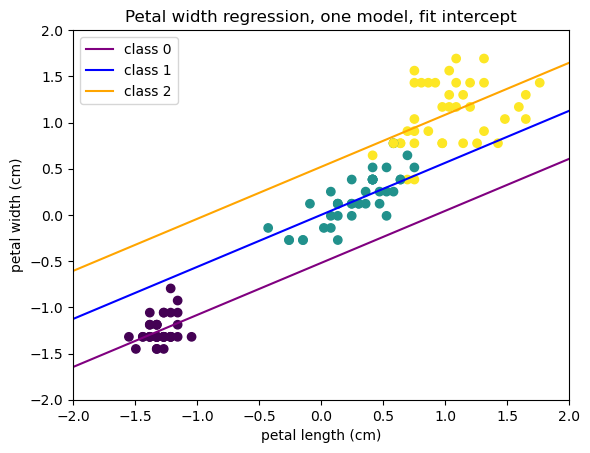

In [36]:
pipe = Pipeline([('ss_scaler',StandardScaler())])
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(np.c_[X_train[:, 0],y_train], X_train[:, 1])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
cs = ["purple","blue","orange"]
for i in range(3):
    xs = np.c_[np.linspace(-2,2,20),i*np.ones(20)]
    plt.plot(xs[:,0],lin_reg.predict(xs),label="class "+str(i),c=cs[i])

plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width regression, one model, fit intercept")
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.legend()
plt.show()

#result: fit_intercept=True splits the classes again

In [37]:
lin_reg.coef_

array([0.56306906, 0.5198868 ])

In [38]:
lin_reg.intercept_

-0.519886800543277